## Useful imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from src.preprocessing import data_diabetes, preprocessing

## Charging the csv in a dataframe

First step is to take a look at the data to know what we are dealing with.

We charge the csv in a panda dataframe and apply multiple methods to visualize the data.

A quick search to the source of the data (https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?select=diabetes_binary_health_indicators_BRFSS2015.csv) gives us the information on the meaning of the data and precisions on the features.

In [ ]:
df = pd.read_csv(data_diabetes)
df

253680 different patients and 22 features.

Most of the features are binary : 1.0 if true and 0.0 if false.

Couple exemples : 
- **"Diabetes_binary** : if the patient has diabetes.
- **"Fruits"** : if the patient eats at least one fruit a day.
- **"PhysHlth"** : if the patient practiced a physical activity in the last 30 days.
- **"Smoker"** : if the patient had more than 100 cigarettes (5 packs) in his life
- **"HighBP"** : high blood pressure

**"Sex"** is 0.0 for female and 1.0 for male

Some features have numerical values :
- **"BMI"** : Body Mass Index : weight(kg) / height(m)t^2 (18.5 to 24.9 is "normal", 25 to 29.9 is "overweight")
- **"MentHlth"** : Days of poor mental health on a 1 to 30 days scale
- **"Age"** : Using the 13-level age category -> 1 = 18-24 | 9 = 60-64 | 13 = 80 
- **"Education"** : level of studies -> 0 = never attended school or only kindergarden etc...
- **"Income"** : level of income on a 1 to 8 scale (in dollars) -> 1 = less than 10,000 | 5 = less than 35,000 | 8 = 75,000 or more

In [ ]:
df.info()

In [ ]:
df.describe()

For binary features, the mean acts as a computation of the percentage of the patients which validate it.

A quick look at the means of the different binary features shows for exemple that most of the patients had a cholesterol check in the last 5 years (0.96), that around half of them smoke (0.44) and that around 14% of them has diabetes (0.139)

For the age, the education or the income we can plot an histogram showing how the data is distributed :

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(df["Age"], bins=20, color="skyblue", edgecolor="black")
axes[0].set_title("Age Distribution")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Frequency")

axes[1].hist(df["Education"], bins=10, color="lightgreen", edgecolor="black")
axes[1].set_title("Education Level")
axes[1].set_xlabel("Education")

axes[2].hist(df["Income"], bins=20, color="salmon", edgecolor="black")
axes[2].set_title("Income Distribution")
axes[2].set_xlabel("Income")

plt.tight_layout()
plt.show()

It shows the patient are mostly educated, have mostly high incomes and are mostly middle aged (40 to 70).

We can print exactly the number of patient having diabetes :

In [ ]:
df["Diabetes_binary"].value_counts()

It is interersting to see the correlation between features. Here we choose features that seems more relevant than others to determine if a patient has diabetes to keep the correlation matrix readable.

In [ ]:
relevant_features = ["HighBP", "HighChol", "BMI", "Sex", "Diabetes_binary"]
corr = df[relevant_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.show()

We can see the distribution of each feature on diabetics and no diabetics

In [ ]:
fig, axes = plt.subplots(7, 3, figsize=(15, 20))
axes = axes.flatten()
for idx, feature in enumerate(df.columns[1:]):
    sns.kdeplot(
        data=df, x=feature, hue="Diabetes_binary", ax=axes[idx], fill=True, palette="Set2", alpha=0.3, common_norm=False
    )
    axes[idx].grid(True)
plt.tight_layout()
plt.show()

# K nearest neighbour


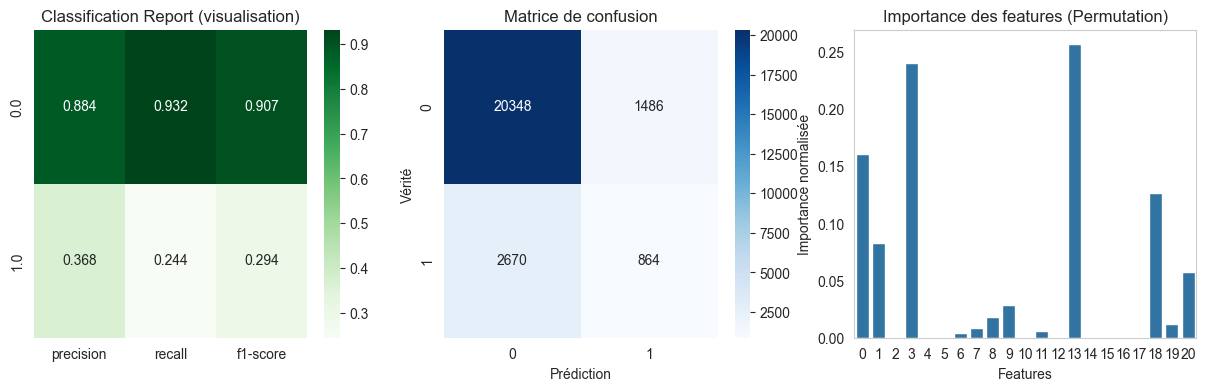

In [5]:
from src.knn import KNNModel

samples = preprocessing(data=data_diabetes, test_size=0.3, validation_size=0.1)
model = KNNModel()
model.train(x=samples.X_train, y=samples.y_train)
model.benchmark(x=samples.X_validation, y=samples.y_validation)

## Analysis


# Neural network : MLP

In [6]:
from src.nn_interface import MLPModel

samples = preprocessing(data=data_diabetes, test_size=0.15, validation_size=0.15)
model = MLPModel(input_size=57)
model.train(samples)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (512x21 and 57x128)

In [ ]:
model.benchmark(samples.X_test, samples.y_test)

# Random Forest

In [ ]:
from src.RForest import RForest

samples = preprocessing(data=data_diabetes, test_size=0.3, validation_size=0.1)
model = RForest()
model.train(x=samples.X_train, y=samples.y_train)

In [ ]:
model.benchmark(x=samples.X_validation, y=samples.y_validation)